<a href="https://colab.research.google.com/github/shrey1234/cmpe_258/blob/main/Assignment_1_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
#!pip install fastai==2.0
#import fastai
!pip install fastai --upgrade
from fastai.vision.all import *

     |████████████████████████████████| 194kB 16.1MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


#Image classification: cnn_learner

In [2]:
path = untar_data(URLs.PETS)/'images'

def is_dog(x): return x[0].islower()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_dog, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.125641,0.020092,0.004060,01:02


epoch,train_loss,valid_loss,error_rate,time
0,0.067760,0.011403,0.003383,01:14


In [4]:
uploader = SimpleNamespace(data = ['/content/drive/MyDrive/Colab Notebooks/258/assign1/dog.jpeg'])
img = PILImage.create(uploader.data[0])
is_dog,_,probs = learn.predict(img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 0.999999


#Segmentation-Unet learner

In [19]:
import gc
    
path = untar_data(URLs.CAMVID_TINY)
print(path)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)
#del variables
gc.collect()
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/root/.fastai/data/camvid_tiny


epoch,train_loss,valid_loss,time
0,3.597821,2.513193,00:03


epoch,train_loss,valid_loss,time
0,1.850148,1.652796,00:03
1,1.578554,1.443128,00:03
2,1.438169,1.102226,00:03
3,1.295324,0.909085,00:03
4,1.170153,0.845481,00:03
5,1.061793,0.805281,00:03
6,0.968500,0.806458,00:03
7,0.895054,0.791396,00:03


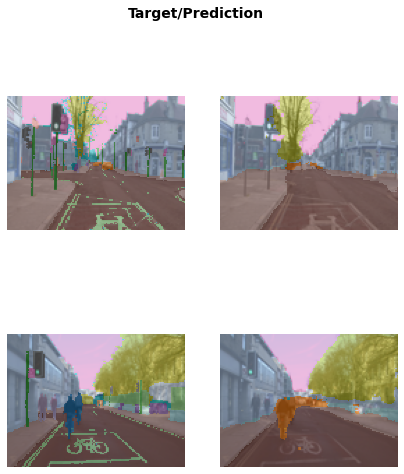

In [20]:
learn.show_results(max_n=6, figsize=(7,8))

#Sentiment analysis- text_classifier_learner

In [11]:
from fastai.text.all import *

path = untar_data(URLs.YELP_REVIEWS_POLARITY)
print(path)

dls = TextDataLoaders.from_csv(path=path, csv_fname='test.csv',text_col=1, label_col=0)
#dls.show_batch(max_n=3)

learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

/root/.fastai/data/yelp_review_polarity_csv


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


epoch,train_loss,valid_loss,accuracy,time
0,0.434914,0.324893,0.864719,01:45


epoch,train_loss,valid_loss,accuracy,time
0,0.258829,0.189002,0.921437,04:20
1,0.188059,0.186508,0.924069,04:20
2,0.145385,0.166808,0.933675,04:20
3,0.108258,0.167513,0.937623,04:20


In [16]:
learn.predict("That place is very bad")

('1', tensor(0), tensor([0.9391, 0.0609]))

#Decision Tree- tabular_learner

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

#Ranking- collab_learner

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

In [ ]:
learn.show_results()

In [2]:
url = URLs.YELP_REVIEWS_POLARITY
untar_data(url,dest='/content/drive/MyDrive/Colab Notebooks/258')


Path('/content/drive/MyDrive/Colab Notebooks/258/yelp_review_polarity_csv')